In [1]:
# import library yang dibutuhkan
import pandas as pd
import scipy.stats as stats

# memuat data file
path = './water_potability.csv' # sumber dari https://www.kaggle.com/adityakadiwal/water-potability
df = pd.read_csv(path)

# menampilkan tipe data untuk tiap kolom, (tidak ada kolom id jadi tidak perlu dipilah)
print(df.dtypes)

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object


1. Statistik Deskriptif (mean, median, modus, varian, standar deviasi)

In [2]:

df.describe() # menampilkan statistik deskriptif dari dataframe

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


2. Visualisasi untuk beberapa variabel/feature dengan variabel yang sesuai

    Disini saya memvisualisasikan variabel Turbidity dan Potability dengan menggunakan scatter plot.

array([[<AxesSubplot:title={'center':'ph'}>]], dtype=object)

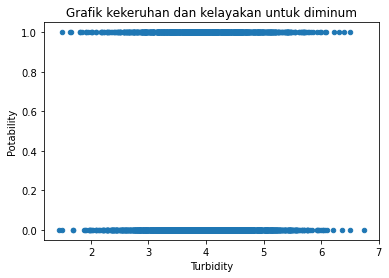

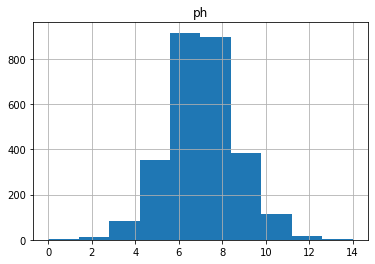

In [3]:
df.plot(x='Turbidity', y='Potability', title='Grafik kekeruhan dan kelayakan untuk diminum',kind='scatter', legend=True) # menampilkan grafik
df.hist(column=['ph']) # visualisasi berupa histogram dari kolom ph

3. Correlation analysis dari 2 feature/variabel dengan pearson correlation dan visualisasi yang sesuai. Lakukan untuk 3 pasangan feature - target.  
    Disini saya memilih pasangan Chloramines dan Conductivity, Chloramines dan ph, serta ph dan Potability.

In [4]:
pearson_coef, p_value = stats.pearsonr(df['Chloramines'], df['Conductivity'])
print(f"Chloramines dan Conductivity:\nPearson Correlation Coefficient: {pearson_coef}\nP-value: {p_value}")
print("--------------------------------------------------------")

pearson_coef, p_value = stats.pearsonr(df['Chloramines'], df['ph'].notnull())
print(f"Chloramines dan ph:\nPearson Correlation Coefficient: {pearson_coef}\nP-value: {p_value}")
print("--------------------------------------------------------")

pearson_coef, p_value = stats.pearsonr(df['ph'].notnull(), df['Potability'])
print(f"ph dan Potability:\nPearson Correlation Coefficient: {pearson_coef}\nP-value: {p_value}")
print("--------------------------------------------------------")

Chloramines dan Conductivity:
Pearson Correlation Coefficient: -0.02048640920836437
P-value: 0.24109956625455156
--------------------------------------------------------
Chloramines dan ph:
Pearson Correlation Coefficient: 0.006407555540903618
P-value: 0.713910763228311
--------------------------------------------------------
ph dan Potability:
Pearson Correlation Coefficient: 0.02549822398149791
P-value: 0.14453605097765132
--------------------------------------------------------


Dari ketiga hasil diatas, Mayoritas memiliki P-value yang cukup besar (>0.05). Jadi dapat disimpulkan, dari hasil diatas baik Chloramines dan ph, Chloramines dan Conductivity, maupun ph dan Potability semuanya tidak ada yang memiliki hubungan linear.